In [1]:
# Import the required modules
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

Let's try a first-order ordinary differential equation (ODE), say:
$$\quad 
\frac{dy}{dx} + y = x, \quad \quad y(0) = 1.
$$
This has a closed-form solution
$$\quad
y = x - 1 + 2e^{-x}
$$
(Exercise: Show this, by first finding the integrating factor.)</p>
<p>We are going to solve this numerically.</p>
<p>First, let's import the "scipy" module and look at the help file for the relevant function, "scipy.integrate.solve_ivp",</p>

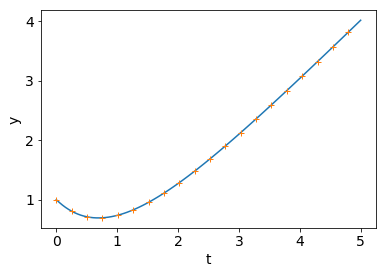

In [77]:
# Solve an initial value problem for a system of ODEs.
from scipy.integrate import solve_ivp

# Define a function which calculates the derivative
def dy_dx(x, y):
    return x - y

ts=np.linspace(0,5,100)
sol = solve_ivp(dy_dx, [0, 5], [y0], t_eval=ts)

ys=np.array(sol.y).flatten()

plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("t")
plt.ylabel("y")
plt.plot(sol.t, ys);

d_f=np.arange(100, step=5) # for decimation

y_exact = ts - 1 + 2*np.exp(-xs)
y_difference = ys - y_exact
plt.plot(ts[d_f], y_exact[d_f], '+');

Now let' study a second order equation, the damped oscillator.

$$\ddot x + 2\eta \dot x + \omega_o^2 x= 0 $$

Here $\eta $ is the damping ratio and $\omega_o$ is the oscillator frequency. $\eta < 1$ is underdamped etc.

Now, let $v = (x, \dot x) $. Then the second order equation can be written as a system of first-order equations:

$$ \dot v_0 = v_1 $$
$$ \dot v_1 + 2 \eta \omega_o v_1+ \omega_o^2 v_0 = 0$$

Now we can use scipy.integrate.solve_ivp as follows:


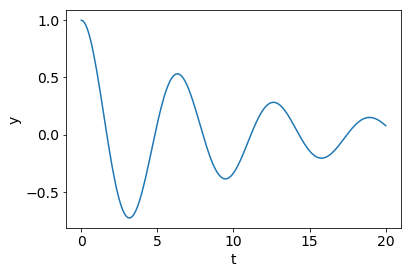

In [95]:

ts=np.linspace(0,20,200)
w_o=1
eta=.1

def dv_dt(t, y):
    v_0dot = y[1]
    v_1dot = -2*eta*w_o*y[1]-w_o*w_o*y[0]
    return [v_0dot, v_1dot]

sol = solve_ivp(dv_dt, [0, 20], [1, 0], t_eval=ts)

plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("t")
plt.ylabel("y")
plt.plot(sol.t, sol.y[0]);

Now let's study another second-order equation, a one-dimensional rocket.

$$\ddot y - \frac{F_t(t)}{m(t)} + \frac{\beta}{m(t)} \dot y + g= 0 $$

$m(t)$ decreases linearly for 2 seconds and then stays constant. $F_t(t)$ is constant during the 2 seconds and then drops to zero, after the rocket fuel is exhausted.

Now we can use scipy.integrate.solve_ivp as follows:

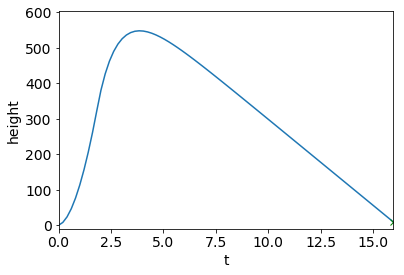

In [135]:
ts=np.linspace(0,20,100)
g=9.8
b=1
Thrust=100
u_ini=0

def m(t):
    if t < 2:
        mass = -0.5*t+2
    else:
        mass = 1.0
    return mass

def Ft(t):
    if t < 2:
        F_t = Thrust
    else:
        F_t = 0.0
    return F_t

def du_dt(t, u):
#    print([t, m(t)])
#    print([t, Ft(t)])
    return Ft(t)/m(t)-(b/m(t))*u - g

sol = solve_ivp(du_dt, [0, 20], [u_ini], t_eval=ts)


y=np.cumsum(sol.y[0])

zero_crossings = np.where(np.diff(np.sign(y))<0)

plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("t")
plt.ylabel("height")
plt.xlim(0, ts[zero_crossings])
plt.ylim(-10, 1.1*np.max(y))
plt.plot(ts, y);
#plt.plot(ts, 100*np.sign(y), 'r');
plt.plot(ts[zero_crossings], y[zero_crossings], 'gx');

